<a href="https://colab.research.google.com/github/JINSUNGWOO/mysite/blob/master/Section1_Project_AI_11_%EC%9A%B0%EC%A7%84%EC%84%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 다음 분기에 어떤 게임을 설계해야 할까

를 정하는 **과정**과 그 **결과**를 보여주는 것이 목표

비데이터 직군이 들어도 **최대한 배경지식이 없는 사람들도 이해할 수 있도록**

**1. 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.**

**2. 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.**

**3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.**

*   여러분이 생각하는 문제 (혹은 풀었으면 좋겠는 문제) 제시
*   그 문제에 대한 가설 및 사용한 데이터셋에 대한 설명, 작업 결과 및 결론
*   어떤 모델을 어떤 코드로 짰냐 보다는,문제 제시 및 그 문제를 해결하기 위해 사용한 방법과 결과들을 설명하는 방식

주어진 데이터 안에서만 활용할것! **외부데이터 X**

2월 16일 오후 6시까지 제출
8분 이내의 발표영상 및 발표자료 제작 면접이라고 생각한다.

금,월,화,수: 프로젝트 데일리 리플렉션//
목: 섹션프로젝트 리뷰

In [3]:
import io
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files


# 데이터 불러오기
uploaded = files.upload()
df = pd.read_csv(io.StringIO(uploaded['vgames2.csv'].decode('utf-8')))

# 데이터 살펴보기
print(df.info(),'\n',df.describe()) # Year만 float이고, 다른 col들은 obj이다. Year의 경우 Date로 변환하고, 출고량을 뜻하는 Sales는 numerical 로 변환한다.
df = df.drop(['Unnamed: 0'], axis = 1).reset_index(drop=True) # 불필요한 col 제거, 인덱스 리셋
df = df.dropna(how='all') # 전체가 빈 row는 제거한다.
df.isna().sum() #결측치: Year:271, Genre:50, Publisher:58
df['NA_Sales'].unique()[:30] # M=1,000,000, k=1,000, 그렇다면 다른 수들의 단위는 얼마일까? // 천이상의 수는 K로, 소수점으로 되어있는 수는 M으로 나타낸것으로보아 아무것도 없는 수들의 단위도 또한 M일것이다.

Saving vgames2.csv to vgames2 (1).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB
None 
          Unnamed: 0          Year
count  16598.000000  16327.000000
mean    8299.500000   1994.242543
std     4791.574219    155.077168
min        1.000000      0.000000
25%     4150.250000   2003.000000
50%     8299.500000   2007.000000
75%    12448.750000   2010.000000
max    1

array(['0.04', '0.17', '0', '0.12', '0.02', '0.07', '480K', '0.14',
       '0.01', '0.57', '0.06', '0.08', '0.48', '0.03', '0.05', '1.93',
       '0.29', '0.19', '0.3', '0.26', '0.11', '0.18', '0.33', '0.51',
       '60K', '0.13', '0.52', '0.34', '0.25', '0.41'], dtype=object)

In [4]:
# 출고량 columns 정리
# M,K에 해당되는 단위를 곱해 float형태로 나타내는 함수정의
def convert_sales(cols):
  for col in cols:
    if cols.endswith("K"):
        return float(cols[:-1]) / (10**3)
    elif cols.endswith("M"):
        return float(cols[:-1])
    else:
        return float(cols)

# 각 col별로 적용
df['NA_Sales']= df['NA_Sales'].apply(convert_sales)
df['EU_Sales']= df['EU_Sales'].apply(convert_sales)
df['JP_Sales']= df['JP_Sales'].apply(convert_sales)
df['Other_Sales']= df['Other_Sales'].apply(convert_sales)

df_sales= df.iloc[:,5:].fillna(0)
df_sales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,0.04,0.00,0.00,0.00
1,0.17,0.00,0.00,0.01
2,0.00,0.00,0.02,0.00
3,0.04,0.00,0.00,0.00
4,0.12,0.09,0.00,0.04
...,...,...,...,...
16593,0.15,0.04,0.00,0.01
16594,0.01,0.00,0.00,0.00
16595,0.44,0.19,0.03,0.13
16596,0.05,0.05,0.25,0.03


In [16]:
df_Genre_Sales = pd.concat((df['Genre'], df_sales), axis=1)
df_Genre_Sales = df_Genre_Sales.groupby('Genre')
df_Genre_Sales= df_Genre_Sales.sum()

def sorted_values(cols):
  for i in cols:
    df_sorted_by_values = df_Genre_Sales.sort_values(by=i ,ascending=False)
    list_a= list(df_sorted_by_values.index)[:5]
    print('{}: {}를 순서대로 선호하는 경향을 보인다.'.format(i,list_a))
  return print('따라서 북미, 유럽과 타지역은 대체로 동일하며 일본에서만 선호하는 장르가 다르다.')

sorted_values(df_Genre_Sales)

# df_Genre_Sales.sum() 지역별 총 출고량
# df_Genre_Sales['Max'] = df_Genre_Sales.idxmax(axis=1) <<< 해당 장르에 대하여 어느 지역이 가장 출고량이 많은지 // 대부분 NA쪽이다.

NA_Sales: ['Action', 'Sports', 'Shooter', 'Platform', 'Misc']를 순서대로 선호하는 경향을 보인다.
EU_Sales: ['Action', 'Sports', 'Shooter', 'Racing', 'Misc']를 순서대로 선호하는 경향을 보인다.
JP_Sales: ['Role-Playing', 'Action', 'Sports', 'Platform', 'Misc']를 순서대로 선호하는 경향을 보인다.
Other_Sales: ['Action', 'Sports', 'Shooter', 'Racing', 'Misc']를 순서대로 선호하는 경향을 보인다.
따라서 북미, 유럽과 타지역은 대체로 동일하며 일본에서만 선호하는 장르가 다르다.


#2. 연도별 게임의 트렌드가 있을까?

게임의 트렌드를 플랫폼과 장르의 변화로 보고, 'Year'를 10년단위로 묶어 총판매량의 변화와 연관성이 있는지 T-test한다.


In [6]:
import datetime as dt
print(df['Year'].unique()) # 20xx.0, 19xx.0 의 형식도 있지만, 0x.0(2000년대), 9x.0(1900년대)도 있다.
print('\n',df['Year'].isnull().sum()) #결측치 271

[2.008e+03 2.009e+03 2.010e+03 2.005e+03 2.011e+03 2.007e+03 2.001e+03
 2.003e+03 2.006e+03 2.014e+03 2.015e+03 2.002e+03 1.997e+03 2.013e+03
 1.996e+03 2.004e+03 2.000e+03       nan 1.984e+03 1.998e+03 2.016e+03
 1.985e+03 1.999e+03 9.000e+00 9.700e+01 1.995e+03 1.993e+03 2.012e+03
 1.987e+03 1.982e+03 1.100e+01 1.994e+03 1.990e+03 1.500e+01 1.992e+03
 1.991e+03 1.983e+03 1.988e+03 1.981e+03 3.000e+00 1.989e+03 9.600e+01
 6.000e+00 8.000e+00 1.986e+03 1.000e+00 5.000e+00 4.000e+00 1.000e+01
 9.800e+01 7.000e+00 1.600e+01 8.600e+01 1.400e+01 9.500e+01 2.017e+03
 1.980e+03 2.020e+03 2.000e+00 1.300e+01 0.000e+00 1.200e+01 9.400e+01]

 271


In [7]:
# 연도별 결측치는 평균값, 앞뒤값, 최소,최대값으로도 구할 수 없기 때문에 제거한다.
# 결측치를 제거하기위해 기존의 데이터프레임은 유지한채 새로운 데이터프레임을 만든다.
df_2 = df
df_2 = df_2.dropna(subset=['Year']).reset_index(drop=True)
df_2

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16322,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16323,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16324,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16325,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [8]:
def convert_year(year):  
    if year < 10:
      year = ('0'+str(year))
      year = dt.datetime.strptime(str(year)[:-2],'%y')
      
    elif 10 <= year < 100:
      year = dt.datetime.strptime(str(year)[:-2],'%y')
      
    else:
      year = dt.datetime.strptime(str(year)[:-2],'%Y')

    return year.strftime('%Y')

df_2['Year']= df_2['Year'].apply(convert_year)
df_2.Year = df_2.Year.astype(int)

In [9]:
df_2 = df_2.sort_values(by='Year').reset_index(drop=True)
df_2['Sum_Sales'] = (df_2.NA_Sales.values+ df_2.EU_Sales.values+ df_2.JP_Sales.values+ df_2.Other_Sales.values)
df_Year_Genre = pd.melt(df_2, id_vars=['Year','Genre'], value_vars=['Sum_Sales'])
df_Year_Genre = df_Year_Genre.groupby(['Year','Genre'])['value'].size()

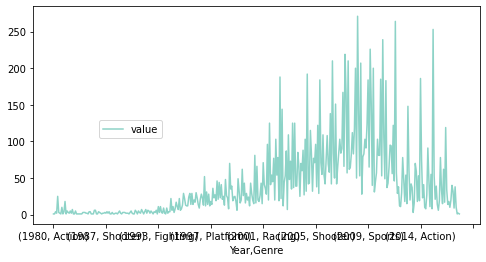

In [10]:
# 10년씩 묶어서 하면 조금 더 깔끔해 질 것 같음.
df_Year_Genre.plot(kind='line',figsize=(8,4), color=sns.color_palette('Set3',len(df_Year_Genre)))
plt.legend(loc="best",bbox_to_anchor=(0.3,0.5))
plt.show()

#3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

출고량 높다 =  Best 30 Games of 16528 games,

출고량이 높은 퍼블리셔는 어디인지, 게임의 장르는 언제인지
위에서 확인했던 연도의 트렌드를 비교했을때 앞으로의 전망(출고량이 높을 게임)은 어떤것인지

시각화: 
퍼블리셔 - 바그래프
장르 - 바그래프
플랫폼별 연차에 따른 게임 발매 갯수

추가:
일본에서 인기 있는 게임은 무엇인지.
최대 시장인 북미에서 성공하려면?
게임이 처음인 우리회사의 다음 개발 목표는 스포츠 형식에 X360 이라면 유럽시장을 목표로했을때 어느정도일지.

In [11]:
df_3 = df
df_3['Sum_Sales'] = (df_3.NA_Sales.values+ df_3.EU_Sales.values+ df_3.JP_Sales.values+ df_3.Other_Sales.values)
df_3 = df_3.sort_values("Sum_Sales", ascending=False).head(30).reset_index(drop=True) # 출고량이 높은 30개의 sample 준비
df_3.Genre = df_3.Genre.fillna('others') # 결측치는 기타로 작성
df_3['Year']= df_3['Year'].apply(convert_year) #연도 float에서 object로 변환

In [12]:
df_3_sales = df_3.iloc[:,5:-1].fillna(0)
df_3_sales
df_Name_Sum = pd.concat((df_3['Name'], df_3_sales), axis=1)
df_Name_Sum = df_Name_Sum.dropna(how='any')
df_Name_Sum = df_Name_Sum.set_index('Name')
df_Name_Sum

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Name,,,,
Wii Sports,41.49,29.02,3.77,8.46
Super Mario Bros.,29.08,3.58,6.81,0.77
Mario Kart Wii,15.85,12.88,3.79,3.31
Wii Sports Resort,15.75,11.01,3.28,2.96
Pokemon Red/Pokemon Blue,11.27,8.89,10.22,1.00
Tetris,23.20,2.26,4.22,0.58
New Super Mario Bros.,11.38,9.23,6.50,2.90
Wii Play,14.03,9.20,2.93,2.85
New Super Mario Bros. Wii,14.59,7.06,4.70,2.26


# 스택그래프

한 게임의 총 판매량의 평균은 25M 으로

다른 게임들에비해 wii sports 가 많이 팔린 이유는 EU에서 판매량이 높았기 떄문이다.


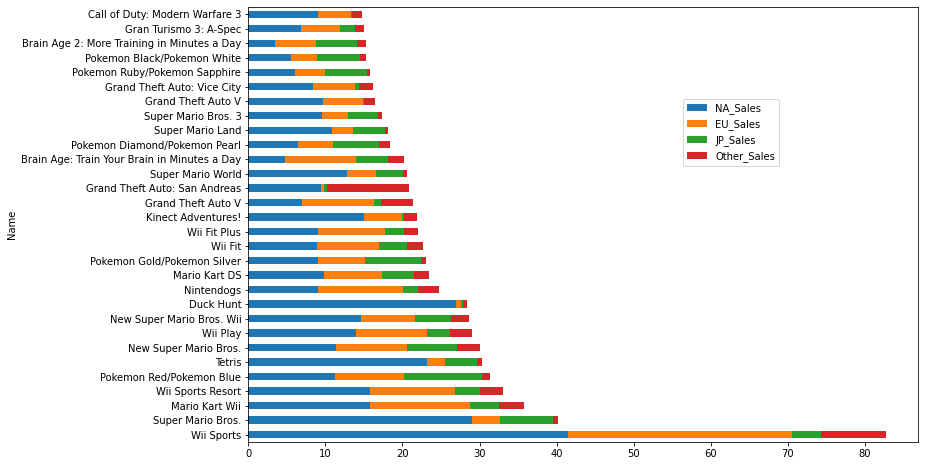

In [13]:
df_Name_Sum.plot(kind="barh",stacked=True,figsize=(12,8))
plt.legend(loc="upper right",bbox_to_anchor=(0.8,0.8))
plt.show()

In [14]:
# 플랫폼 별 갯수와 판매량 보기위해 새로운 데이터 프레임 생성

df_4= df_3.melt(id_vars=['Platform','Publisher'], value_vars=['Sum_Sales'])
df_4 = df_4.groupby(by='Platform')
df_5 = df_4.size()

df_6 = df_4.sum()
(df_5,df_6)
df_7 = pd.concat([df_5,df_6],axis=1)
df_7.columns = ('Number','Amount')
df_7.Amount = df_7.Amount.rank(method='first',ascending=True)
df_7=df_7.sort_values('Amount',ascending=False)

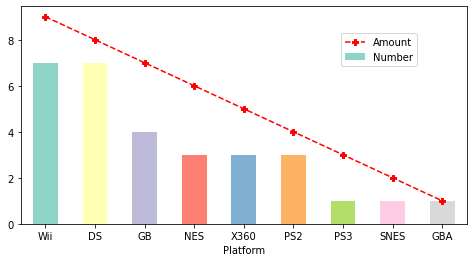

In [15]:
df_7.Number.plot(kind='bar',figsize=(8,4), color=sns.color_palette('Set3',len(df_7.Number)))
df_7.Amount.plot(kind='line',color = 'red', linestyle = '--', marker='P')
plt.legend(loc="upper right",bbox_to_anchor=(0.9,0.9))
plt.show()